# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem, but to make it simple : predicting a continuous (numerical) variable based on some other combination of variables.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.utils import plot_model

Note : in order to use plot_model, one must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.

### Creating data to view and fit

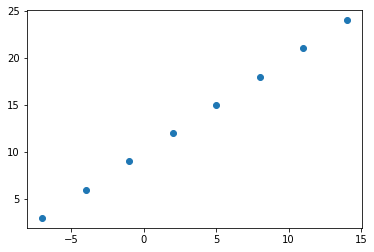

In [4]:
# Create features
X = np.array([-7., -4, -1, 2, 5, 8, 11, 14])

# Create labels
y = np.array([3., 6, 9, 12, 15, 18, 21, 24])

# Visualize it
plt.scatter(X,y)

In [5]:
X+10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [6]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [7]:
# Turning the NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [8]:
X

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>

In [9]:
# Expand the dimension of a tensor : https://www.geeksforgeeks.org/python-tensorflow-expand_dims/
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

### Steps in modeling in TensorFlow

1. **Creating the model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling the model** - define the loss function (the function which will tells our model how far its from performing well), the optimizer (tells the model how to update its internal patterns to better its predictions) and the evaluation metrics (human interpretable values for how well the model is doing).
3. **Fitting the model** - letting the model try to find patterns between features and labels.
4. **Evaluation** - Evaluate the model on the test data (in order to know how reliable are the model's predictions ?)


In TensorFlow, there are two main way of creating a model :
* Sequential API
* Functional API

In [10]:
# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE : Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # SGD : Stochastic Gradient Descent
              metrics=["mae"]
             )

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 586ms/step - loss: 9.9794 - mae: 9.9794
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 9.8469 - mae: 9.8469
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 9.7144 - mae: 9.7144
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 9.5819 - mae: 9.5819
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 9.4494 - mae: 9.4494


**Note**  
A lot of function in TensorFlow, if they have a shortcut name (e.g. mae or SGD), can be replaced by a string variable to define the fact it is wished to used that specific function. For e.g., the step 2 in the above cell( Compile the model), can also be written as such : 

model.compile(loss="mae",  
              optimizer="sgd",  
              metrics=["mae"]  
             )

In [11]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
# Trying to make a prediction using our model
model.predict([17.])

1/1 [==============================] - 0s 187ms/step


array([[20.125256]], dtype=float32)

The predicted value (y) should be 27 when X is 17. But we got -13.89, which is pretty far off. This is no surprising because the current MAE of our model is 17.3050, which means : on average, our model predict something that is 17.3050 points off where is should be (MAE).

In [13]:
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 78ms/step


array([[20.125256]], dtype=float32)

In [14]:
y_pred + 17.3050

array([[37.430256]], dtype=float32)

The value is still off, our model is performing poorly.   
Now, we need to improve our model.

### Improving our model

We can improve our model by altering the steps we took to create a model.  

1. **Creating a model** - Here, we might :
* add more layers, 
* increase the number of hidden units (also called neurons) within each of th hidden layers, 
* change the activation function of each layer

2. **Compiling the model** - Here, we might :
* change the optimization function, or perhaps ,
* or perhaps changes the **learning rate** of the optimization funciton

3. **Fitting the model** - Here, we might :
* fit the model for more epochs (make it training for longer)
* fit the model on more data (give the model more examples to learn from)

In [15]:
# 1st experiment : add a hidden layer, and more epochs, as an improvement to the model

# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    
    # Adding more hidden layers, more neurons, and activation function 
    tf.keras.layers.Dense(100, activation="relu"),
    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE : Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
             )

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100) # Increasing the number of epochs


Epoch 1/100
1/1 [==============================] - 1s 619ms/step - loss: 14.6298 - mae: 14.6298
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 14.2109 - mae: 14.2109
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 13.8004 - mae: 13.8004
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 13.3944 - mae: 13.3944
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 12.9895 - mae: 12.9895
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 12.5863 - mae: 12.5863
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 12.1806 - mae: 12.1806
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 11.7616 - mae: 11.7616
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3298 - mae: 11.3298
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8819 - mae: 10.8819
Epoch 11/100
1/1 [==============================] - 0s 4m

1/1 [==============================] - 0s 4ms/step - loss: 3.6971 - mae: 3.6971
Epoch 89/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7425 - mae: 3.7425
Epoch 90/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7050 - mae: 3.7050
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 3.7159 - mae: 3.7159
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 3.7129 - mae: 3.7129
Epoch 93/100
1/1 [==============================] - 0s 5ms/step - loss: 3.6962 - mae: 3.6962
Epoch 94/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7288 - mae: 3.7288
Epoch 95/100
1/1 [==============================] - 0s 7ms/step - loss: 3.6693 - mae: 3.6693
Epoch 96/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7370 - mae: 3.7370
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 3.6751 - mae: 3.6751
Epoch 98/100
1/1 [==============================] - 0s 4ms/step - loss: 3.7112 - ma

The 1st experiment has resulted in a good improvement of the model

In [16]:
# Check how the model's prediction has improved...
model.predict([17.])

1/1 [==============================] - 0s 130ms/step


array([[32.548733]], dtype=float32)

In [17]:
# 2nd experiment : buil a larger model, as an improvement to the model

# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    
    # Adding more hidden layers, more neurons, and activation function 
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE : Mean Absolute Error
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr = Learning Rate
              metrics=["mae"]
             )

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y, epochs=300) # Increasing the number of epochs


Epoch 1/300


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 1s 795ms/step - loss: 12.6647 - mae: 12.6647
Epoch 2/300
1/1 [==============================] - 0s 4ms/step - loss: 12.6278 - mae: 12.6278
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 12.5909 - mae: 12.5909
Epoch 4/300
1/1 [==============================] - 0s 8ms/step - loss: 12.5540 - mae: 12.5540
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 12.5171 - mae: 12.5171
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 12.4802 - mae: 12.4802
Epoch 7/300
1/1 [==============================] - 0s 7ms/step - loss: 12.4436 - mae: 12.4436
Epoch 8/300
1/1 [==============================] - 0s 7ms/step - loss: 12.4080 - mae: 12.4080
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 12.3727 - mae: 12.3727
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 12.3371 - mae: 12.3371
Epoch 11/300
1/1 [==============================] - 0s 7ms/step - los

1/1 [==============================] - 0s 5ms/step - loss: 9.4451 - mae: 9.4451
Epoch 88/300
1/1 [==============================] - 0s 5ms/step - loss: 9.4053 - mae: 9.4053
Epoch 89/300
1/1 [==============================] - 0s 5ms/step - loss: 9.3651 - mae: 9.3651
Epoch 90/300
1/1 [==============================] - 0s 6ms/step - loss: 9.3246 - mae: 9.3246
Epoch 91/300
1/1 [==============================] - 0s 5ms/step - loss: 9.2838 - mae: 9.2838
Epoch 92/300
1/1 [==============================] - 0s 5ms/step - loss: 9.2426 - mae: 9.2426
Epoch 93/300
1/1 [==============================] - 0s 5ms/step - loss: 9.2013 - mae: 9.2013
Epoch 94/300
1/1 [==============================] - 0s 5ms/step - loss: 9.1596 - mae: 9.1596
Epoch 95/300
1/1 [==============================] - 0s 5ms/step - loss: 9.1175 - mae: 9.1175
Epoch 96/300
1/1 [==============================] - 0s 6ms/step - loss: 9.0751 - mae: 9.0751
Epoch 97/300
1/1 [==============================] - 0s 5ms/step - loss: 9.0322 - ma

1/1 [==============================] - 0s 5ms/step - loss: 4.2216 - mae: 4.2216
Epoch 175/300
1/1 [==============================] - 0s 6ms/step - loss: 4.1359 - mae: 4.1359
Epoch 176/300
1/1 [==============================] - 0s 6ms/step - loss: 4.1024 - mae: 4.1024
Epoch 177/300
1/1 [==============================] - 0s 6ms/step - loss: 4.0764 - mae: 4.0764
Epoch 178/300
1/1 [==============================] - 0s 5ms/step - loss: 4.0517 - mae: 4.0517
Epoch 179/300
1/1 [==============================] - 0s 5ms/step - loss: 4.0283 - mae: 4.0283
Epoch 180/300
1/1 [==============================] - 0s 5ms/step - loss: 4.0061 - mae: 4.0061
Epoch 181/300
1/1 [==============================] - 0s 6ms/step - loss: 3.9850 - mae: 3.9850
Epoch 182/300
1/1 [==============================] - 0s 5ms/step - loss: 3.9647 - mae: 3.9647
Epoch 183/300
1/1 [==============================] - 0s 5ms/step - loss: 3.9452 - mae: 3.9452
Epoch 184/300
1/1 [==============================] - 0s 5ms/step - loss: 3

1/1 [==============================] - 0s 5ms/step - loss: 3.7680 - mae: 3.7680
Epoch 262/300
1/1 [==============================] - 0s 5ms/step - loss: 3.7674 - mae: 3.7674
Epoch 263/300
1/1 [==============================] - 0s 6ms/step - loss: 3.7671 - mae: 3.7671
Epoch 264/300
1/1 [==============================] - 0s 5ms/step - loss: 3.7647 - mae: 3.7647
Epoch 265/300
1/1 [==============================] - 0s 6ms/step - loss: 3.7629 - mae: 3.7629
Epoch 266/300
1/1 [==============================] - 0s 6ms/step - loss: 3.7628 - mae: 3.7628
Epoch 267/300
1/1 [==============================] - 0s 5ms/step - loss: 3.7636 - mae: 3.7636
Epoch 268/300
1/1 [==============================] - 0s 5ms/step - loss: 3.7629 - mae: 3.7629
Epoch 269/300
1/1 [==============================] - 0s 4ms/step - loss: 3.7608 - mae: 3.7608
Epoch 270/300
1/1 [==============================] - 0s 5ms/step - loss: 3.7608 - mae: 3.7608
Epoch 271/300
1/1 [==============================] - 0s 5ms/step - loss: 3

The 2nd model, although more larger, don't provide a better training result compared to the previously built one.

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
# Check if the model's prediction has improved...
model.predict([17.])

1/1 [==============================] - 0s 146ms/step


array([[32.074795]], dtype=float32)

In [20]:
# 3rd experiment : add a hidden layer, more epochs, and review the learning rate, as an improvement to the model

# Set a random seed (in order to have some reproducibility)
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    
    # Adding more hidden layers, more neurons, and activation function 
    tf.keras.layers.Dense(100, activation="relu"),
    
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # MAE : Mean Absolute Error
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"]
             )

# 3. Fit the model 
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100) # Increasing the number of epochs


Epoch 1/100
1/1 [==============================] - 1s 665ms/step - loss: 14.0262 - mae: 14.0262
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.1732 - mae: 13.1732
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 12.3446 - mae: 12.3446
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.5259 - mae: 11.5259
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9078 - mae: 10.9078
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.3041 - mae: 10.3041
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.6914 - mae: 9.6914
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.0710 - mae: 9.0710
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.4391 - mae: 8.4391
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.7877 - mae: 7.7877
Epoch 11/100
1/1 [==============================] - 0s 5ms/step 

1/1 [==============================] - 0s 5ms/step - loss: 0.2312 - mae: 0.2312
Epoch 90/100
1/1 [==============================] - 0s 14ms/step - loss: 0.3051 - mae: 0.3051
Epoch 91/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2890 - mae: 0.2890
Epoch 92/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2147 - mae: 0.2147
Epoch 93/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2526 - mae: 0.2526
Epoch 94/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1509 - mae: 0.1509
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1626 - mae: 0.1626
Epoch 96/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1249 - mae: 0.1249
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1453 - mae: 0.1453
Epoch 98/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1241 - mae: 0.1241
Epoch 99/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1950 - m

The loss is 0.1750; this model should perform really well.

In [21]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [22]:
# Check if the model's prediction has improved...
model.predict([17.])

1/1 [==============================] - 0s 133ms/step


array([[27.381882]], dtype=float32)

The model as predicted 26.918, while the real value is 27. We can conclude that the prediction is pretty well.  
**Observation** : adjusting the learning rate of our model has result in the best improvement so far.

**Model improvement rules** - When improving a model :
* **make many small changes** (experiments) and **test each one**, rather than always doing extremely large changes, because otherwise, if one does too big of a change, he might not be sure what caused the improvement or know improvement of the model.
* **the learning rate is potentially the most important hyper-parameter that can be changed** on a neural networks in order to improve it

## Evaluating a model


In practice, a typical workflow one goes through when buidling neural networks is :    
``` Build a model -> fit it -> evaluate it -> tweak a model -> fit it evaluate it -> tweak a model -> fit it -> evaluate it -> ... ```



When it comes to evaluation, there is one words one should memorize, and remember : **visualize**.

It's a good idea to visualize : 
* The data - what data wre we working with ? What does it look like ?
* The model itself - what does our model look like ?
* The training of the model - how does the model perform while it learns ?
* The predictions of the model - how do the predictions of the model line up agains the real values ?


Let us dig into these steps here a bit further by working on a little bit of a larger problem.

In [23]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [24]:
# Make labels for the dataset

y = X + 10   # y = X + 10 is the formula(pattern) we want the model to learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

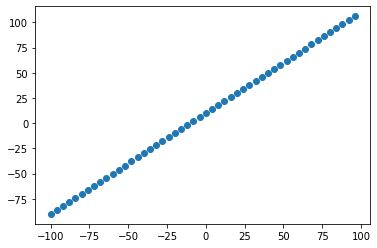

In [25]:
# Visualize the data

plt.scatter(X, y)

### The 03 set of data

* **Training set** - the model learns from this data, which is typically 70-80% of the total data available.
* **Validation set** - the model gets tuned on this data (it is the above mentionned *tweak the model*), which is typically 10-15% of the total data available.
* **Test set** - the model gets evaluated on this data to test what is has learned (to check how it performs on data is hasn't see before); this set is typically 10-15% of the available data.

In [26]:
# Check how many samples we have
nb_data = len(X)
nb_data

50

In [27]:
# Split the data into train and test sets

X_train = X[: int(nb_data*.8)] # 80% of the data
y_train = y[: int(nb_data*.8)] # 80% of the data

X_test = X[int(nb_data*.8):] # 20% of the data
y_test = y[int(nb_data*.8):] # 20% of the data


len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now that data was divided in training and testing sets, let's visualize it again.

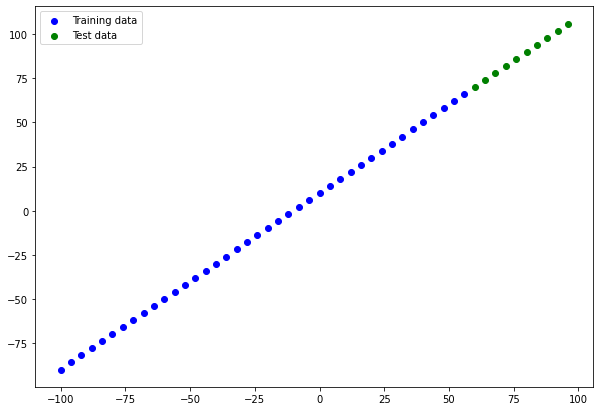

In [28]:
plt.figure( figsize=(10,7) )

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")

#Show a legend
plt.legend()

### Building a neural network

In [29]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.SGD(),
             metrics=["mae"])



#### Visualizing the model

In [30]:
# Get an idea of what the model looks like before running it
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [31]:
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [32]:
X.ndim

1

In [33]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

* The explanation of the Prof : X[0] contains a scalar, so the input_shape of our model is 1; X[0] could contain 3 different numbers, so input_shape would be 3.    
* My own deduction : Another way to analyze it is based on the number of dimensions of X : X.ndim return 1, which means X is represented on one dimension, so the input shape is 1.

In [34]:
# Let's create a model which builds automatically by 
#    defining the input_shape argument in the first layer (that is what is usually done in practice)

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape= [X.ndim] ) # tf.keras.layers.Dense(1, input_shape= [1] )
                                                     #     refer to the previous cell to get 
                                                     #      explanations on why input_shape= [1]   
]) 

# 2. COmpile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])




In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


.summary() on a model show the layers it contains, the output shape, and the number of parameters of each layer.   
   
* The **Ouput Shape** here (None, 1) : the representation here is something I personnally need to do more research on
* The **Layer Type** `Dense` : it is another word for `fully connected`. A fully connected layer means each neuron in the said layer connects to all neurons in the next layer.
* There are 2 **Params** :  
 - **Total params** : total number of parameters in the model; these are the patterns that the model is going to learn
 - **Trainable parameters** : these are the parameters (patterns) the model can update as it trains
 - **Non-trainable params** : these are the patterns the model cannot update as it trains; when we import a model that has already learned patterns in data (**transfer learning**), we might freeze those learned patterns so that the model retains what it already knows

📖 **Resource**: For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video at http://introtodeeplearning.com/ 

🛠️**Exercise**: Try playing around with the number of hdden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`

In [36]:
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape= [X.ndim] )  
]) 

# 2. COmpile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Let us change the number of neuro from 3 to 1

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape= [X.ndim] )  
]) 

# 2. COmpile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])


model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 3. Fit the model to the training data for 100 epochs
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1489 - mae: 9.1489
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5725 - mae: 8.5725
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 13.8516 - mae: 13.8516
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 7.5694 - mae: 7.5694
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 11.9853 - mae: 11.9853
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2708 - mae: 9.2708
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.4364 - mae: 8.4364
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0281 - mae: 9.0281
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.4256 - mae: 18.4256
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 9.9293 - mae: 9.9293
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss: 8

2/2 [==============================] - 0s 3ms/step - loss: 10.2828 - mae: 10.2828
Epoch 89/100
2/2 [==============================] - 0s 4ms/step - loss: 6.7416 - mae: 6.7416
Epoch 90/100
2/2 [==============================] - 0s 3ms/step - loss: 8.1118 - mae: 8.1118
Epoch 91/100
2/2 [==============================] - 0s 4ms/step - loss: 6.8889 - mae: 6.8889
Epoch 92/100
2/2 [==============================] - 0s 4ms/step - loss: 8.9822 - mae: 8.9822
Epoch 93/100
2/2 [==============================] - 0s 4ms/step - loss: 7.4899 - mae: 7.4899
Epoch 94/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1084 - mae: 9.1084
Epoch 95/100
2/2 [==============================] - 0s 4ms/step - loss: 10.5724 - mae: 10.5724
Epoch 96/100
2/2 [==============================] - 0s 4ms/step - loss: 10.5725 - mae: 10.5725
Epoch 97/100
2/2 [==============================] - 0s 4ms/step - loss: 6.9960 - mae: 6.9960
Epoch 98/100
2/2 [==============================] - 0s 3ms/step - loss: 9.143

In [39]:
# Fit the model again, for another 100 epochs (so for a total of 200 epochs)
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 12.0328 - mae: 12.0328
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 8.4213 - mae: 8.4213
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1015 - mae: 11.1015
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 8.5921 - mae: 8.5921
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 9.5339 - mae: 9.5339
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 8.7300 - mae: 8.7300
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 7.8561 - mae: 7.8561
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 8.0888 - mae: 8.0888
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.7513 - mae: 18.7513
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1735 - mae: 9.1735
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss: 7

2/2 [==============================] - 0s 4ms/step - loss: 10.7006 - mae: 10.7006
Epoch 89/100
2/2 [==============================] - 0s 4ms/step - loss: 6.0201 - mae: 6.0201
Epoch 90/100
2/2 [==============================] - 0s 5ms/step - loss: 12.9366 - mae: 12.9366
Epoch 91/100
2/2 [==============================] - 0s 3ms/step - loss: 6.8834 - mae: 6.8834
Epoch 92/100
2/2 [==============================] - 0s 4ms/step - loss: 7.1080 - mae: 7.1080
Epoch 93/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5357 - mae: 8.5357
Epoch 94/100
2/2 [==============================] - 0s 4ms/step - loss: 7.8858 - mae: 7.8858
Epoch 95/100
2/2 [==============================] - 0s 3ms/step - loss: 11.3676 - mae: 11.3676
Epoch 96/100
2/2 [==============================] - 0s 4ms/step - loss: 8.3992 - mae: 8.3992
Epoch 97/100
2/2 [==============================] - 0s 4ms/step - loss: 12.1466 - mae: 12.1466
Epoch 98/100
2/2 [==============================] - 0s 4ms/step - loss: 7.4

🔑 Every time model.fit() is called, it's going to fit for the extra epochs provided as parameters : the epochs are cumulative.

### Visualizing a model's layers

In [40]:
# Creating a new model, with 10 units in the hidden layers

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape= [X.ndim] )  
]) 

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])


model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

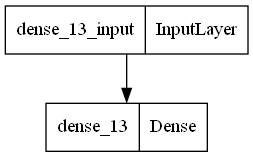

In [42]:
# Looking at the layers of the model
plot_model(model=model)

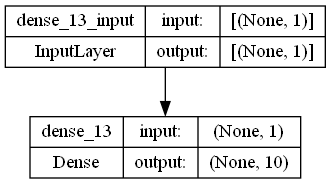

In [43]:
# Looking at the layers of the model, with it's shape
plot_model(model=model, show_shapes=True)

The plot_model() above will be very handy later on when we start creating more complex models with more hidden layers. 
   
Let's observe the plot of a little more complex model

In [44]:
# Creating a model, with 10 units in the hidden layers, and an output layer

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape= [X.ndim], name="input_layer" ), 
    tf.keras.layers.Dense(1, name="output_layer")
], name="amazing_model") 

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=["mae"])


model.summary()


Model: "amazing_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [46]:
model.summary()

Model: "amazing_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


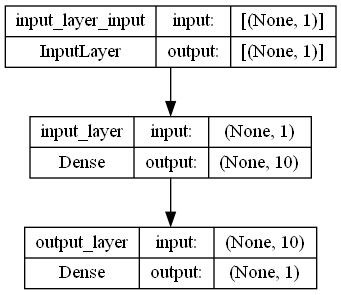

In [47]:
# Looking at the layers of the model, with it's shape
plot_model(model=model, show_shapes=True)

### Visualizing the model's predictions  
  
To visualize predictions, it's a good idea to plot them against the ground truth labels.  
  
Often, one will see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus the model's predictions).

In [48]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 93ms/step


array([[ 70.39513 ],
       [ 74.97403 ],
       [ 79.552956],
       [ 84.13186 ],
       [ 88.71077 ],
       [ 93.28969 ],
       [ 97.86859 ],
       [102.44751 ],
       [107.026405],
       [111.60534 ]], dtype=float32)

In [49]:
# Looking at the content of y_test (the real value)
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [51]:
# Creating a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train,
                    test_data=X_test, test_labels=y_test,
                    predictions=y_pred):
    """
        Plots training data, test data, and compares predictions to ground truth labels.
    """
    plt.figure( figsize=(10,7) )

    # Plot training data in blue 
    plt.scatter(train_data, train_labels, c="b", label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Test data")
    
    # Plot prediction data
    plt.scatter(test_data,predictions,c="r", label="Predictions")

    #Show a legend
    plt.legend() 

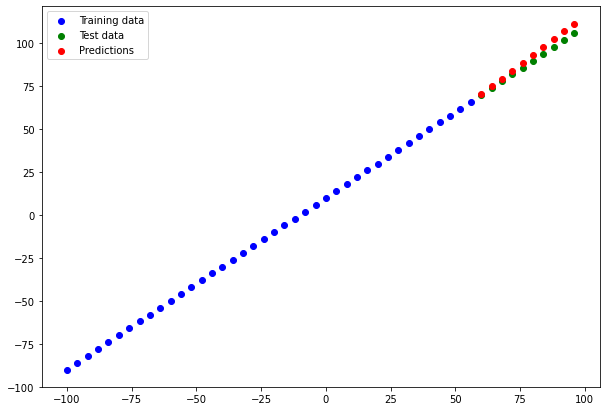

In [52]:
plot_predictions()

Looking at the plots, the model appear to be good since the distance between test data and the predictions is small. But depending on the scale of the plot, that seemingly short distance can in fact represent a fairly large error.   
So the way that be figured out is by some evaluation metrics.


### Evaluation a model's predictions with regression evaluation metrics